### Import libraries

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

### Read the Data

In [7]:
df = pd.read_parquet('../../data/submissions.parquet')

# use only the test set for analysis
df = df[df['train_valid_test'] == 'test']

### Get Summary Statistics

In [3]:
# get the variance of each topic's c_score
pivot = df.pivot_table(index='bertopic', values='c_score', aggfunc=['mean', 'std', 'var', 'count'])

# rename the columns
pivot.columns = ['mean', 'std', 'var', 'count']

# remove the "others/placeholder" topic
pivot = pivot[pivot.index != '-1_my_was_me_and']

# sort values
pivot.sort_values('std', ascending=False, inplace=True)

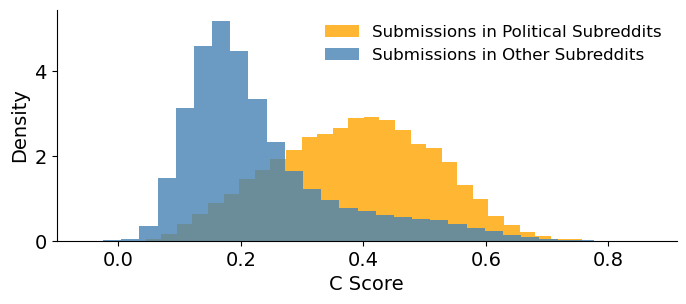

In [34]:
fig, ax = plt.subplots(figsize=(8,3))

ax.hist(df[df['subreddit'].isin(['Conservative', 'Liberal', 'politics'])]['c_score'], bins=31, density=True, label='Submissions in Political Subreddits', alpha=.8, color='orange')
ax.hist(df[~df['subreddit'].isin(['Conservative', 'Liberal', 'politics'])]['c_score'], bins=31, density=True, label='Submissions in Other Subreddits', alpha=.8, color='steelblue')

ax.set_xlabel('C Score')
ax.set_ylabel('Density')

ax.legend(frameon=False, fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('../../figures/c_score_by_category.pdf')

plt.show()